**Ejercicio 1**

In [69]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

nums = np.random.randint(100, 3000, (8, 4))
letters = np.reshape(list("abcd")*2, (8,1))
values = np.append(nums, letters, axis = 1)
fecha = pd.date_range("20230915", periods=8)
df = pd.DataFrame(values, index=fecha, columns=list("VWXYZ"))

keys = df.columns.values.tolist()
types_dict = {}
[types_dict.update({key : 'int64'}) for key in keys if key != 'Z']
print(types_dict)
df = df.astype(types_dict)
print(df.dtypes)


{'V': 'int64', 'W': 'int64', 'X': 'int64', 'Y': 'int64'}
V     int64
W     int64
X     int64
Y     int64
Z    object
dtype: object


**Tarea 1**
Descargar el archivo GCB2022v27_MtCO2_flat.csv de kaggle

Explorar el dataset

desplegar nombres de columnas
tipo de datos
distribucion de NaNs
¿De cuántos países diferentes hay datos?

Graficar los valores globales y los de Mexico para: 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita'.

Extraer datos de los países pertenecientes al G20 y graficar las columnas del punto anterior.

Cuales son los 3 países que más contaminan en cada uno de los casos?
Considerando solo la emisión de los paises del G20, con que porcentaje contribuye México al Total y Per Capita?
Eliminar NaNs.

Aplicar merge, groupby.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

#Se hace la importación del dataset como un DataFrame desde un archivo CSV
df = pd.read_csv(r'C:\Users\yakin\OneDrive - Universidad de Guanajuato\Documentos\Universidad de Guanajuato\8vo Semestre\DataAnalysis_DCI_UGTO\Recursos\archive\GCB2022v27_MtCO2_flat.csv')
df

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


**Impresión del nombre de las columnas, tipo de dato y distribución de NaN's**

In [71]:
columns = df.columns.values.tolist()
print('Nombres por columna: \n', columns)
print('\n Tipos de dato por columna: \n', df.dtypes.to_dict())

nan_count = {}
[nan_count.update({column : df[column].isna().sum()}) for column in columns]
print(f'\nDistribución de valores nulos (NaN) por columna \n{nan_count}')
    
countries = set(df['Country'].values)
print(f'\nEn el dataframe hay datos de {len(countries)} países diferentes')

Nombres por columna: 
 ['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita']

 Tipos de dato por columna: 
 {'Country': dtype('O'), 'ISO 3166-1 alpha-3': dtype('O'), 'Year': dtype('int64'), 'Total': dtype('float64'), 'Coal': dtype('float64'), 'Oil': dtype('float64'), 'Gas': dtype('float64'), 'Cement': dtype('float64'), 'Flaring': dtype('float64'), 'Other': dtype('float64'), 'Per Capita': dtype('float64')}

Distribución de valores nulos (NaN) por columna 
{'Country': 0, 'ISO 3166-1 alpha-3': 1632, 'Year': 0, 'Total': 200, 'Coal': 41360, 'Oil': 41387, 'Gas': 41486, 'Cement': 42290, 'Flaring': 41554, 'Other': 61484, 'Per Capita': 44130}

En el dataframe hay datos de 232 países diferentes


**Visualización de los datos de México vs el resto del mundo**


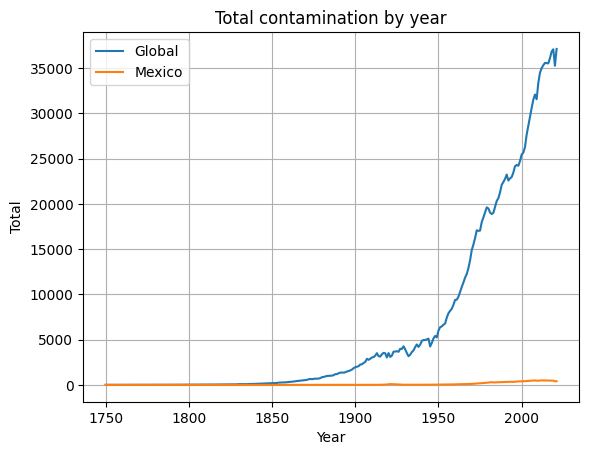

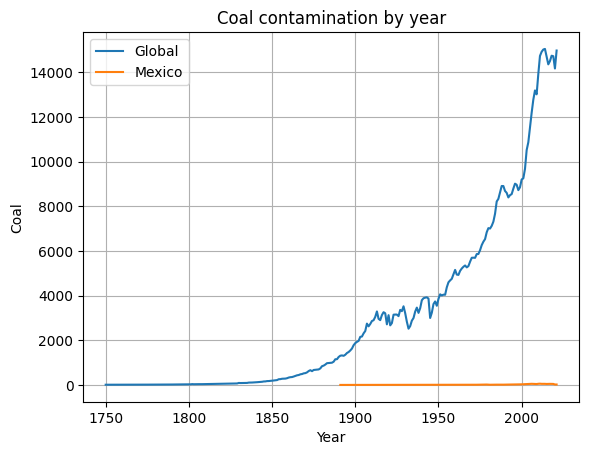

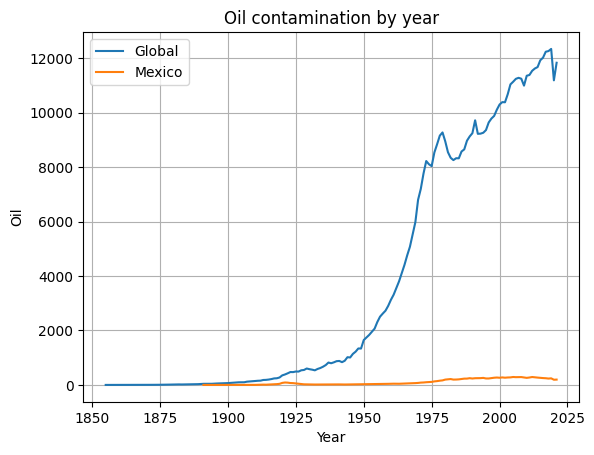

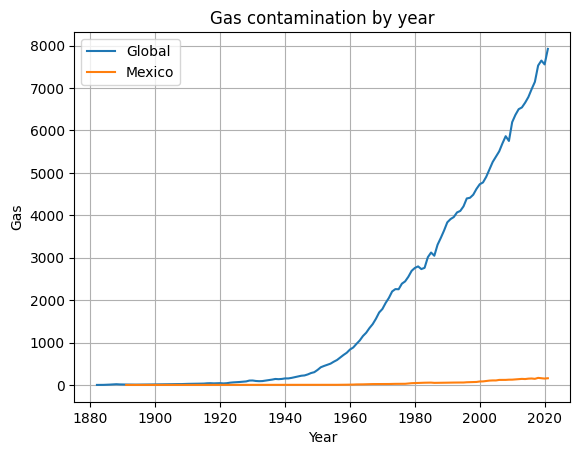

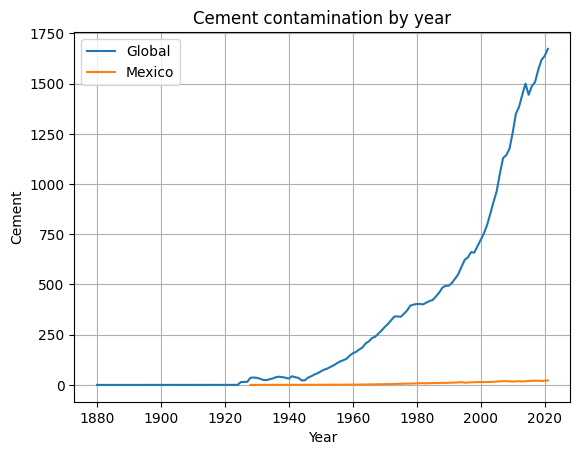

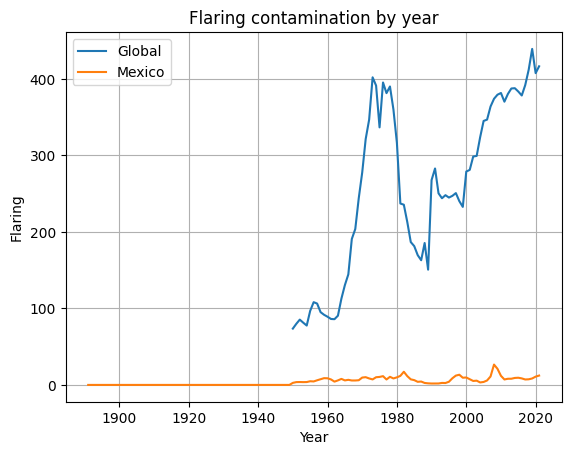

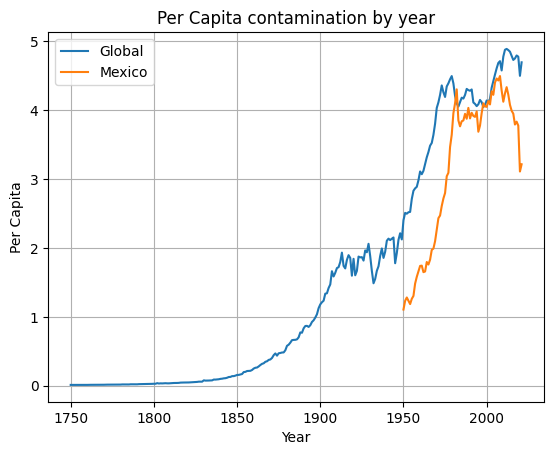

In [72]:
#Separación de los datos de México y Global del resto del dataset
global_data = df[df['Country'] == 'Global']
mexico_data = df[df['Country'] == 'Mexico']

#Se seleccionan las columnas de las que se desea obtener una gráfica
columns_to_graph = ['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita']

#Y se cicla sobre cada columna para generar la gráfica.
for index, column in enumerate(columns_to_graph):
    fig, ax = plt.subplots()
    global_data.plot(x = 'Year', y = column, ax = ax, label = 'Global', title = column + ' contamination by year', grid = True, ylabel = column, xlabel = 'Year')
    mexico_data.plot(x = 'Year', y = column, ax = ax, label = 'Mexico', title = column + ' contamination by year', grid = True, ylabel = column, xlabel = 'Year')
    

**Visualización de los datos del G20**

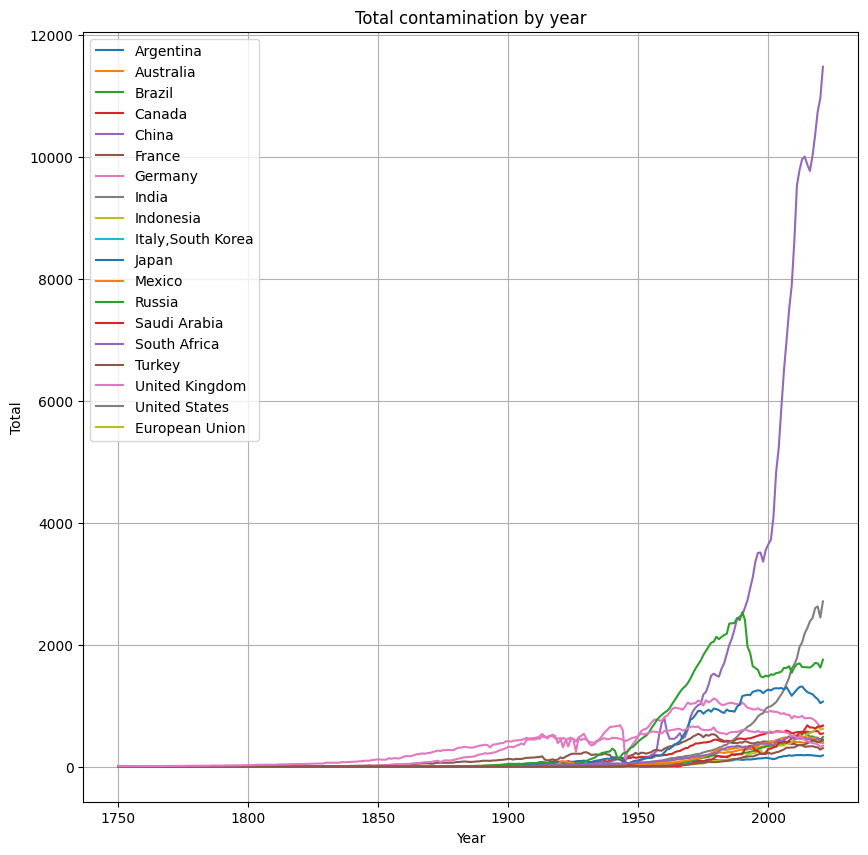

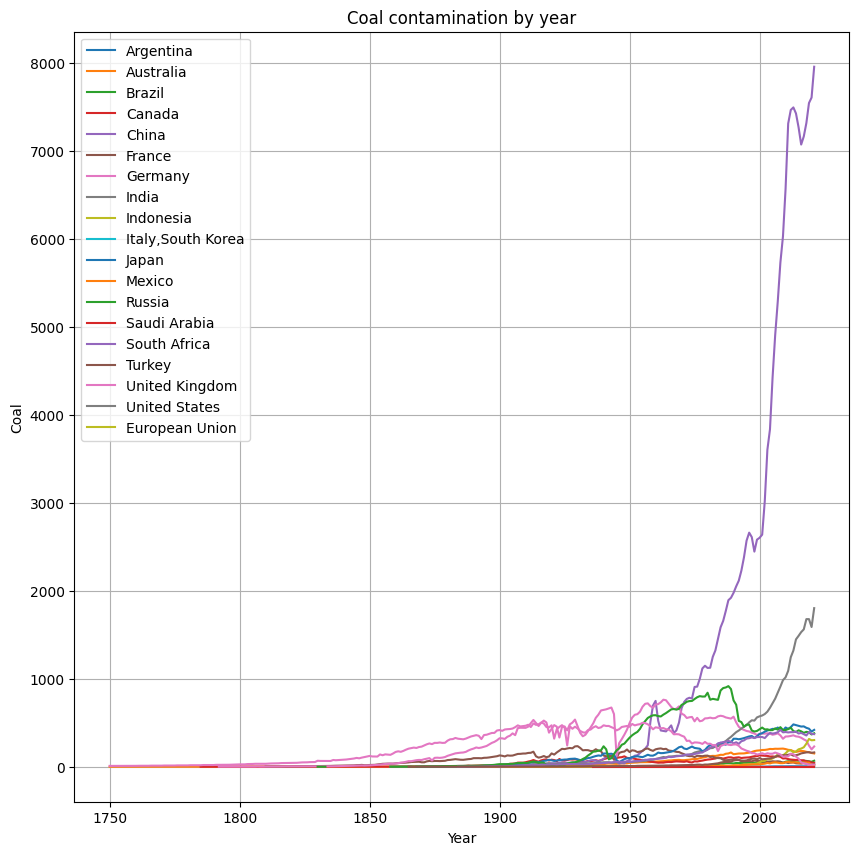

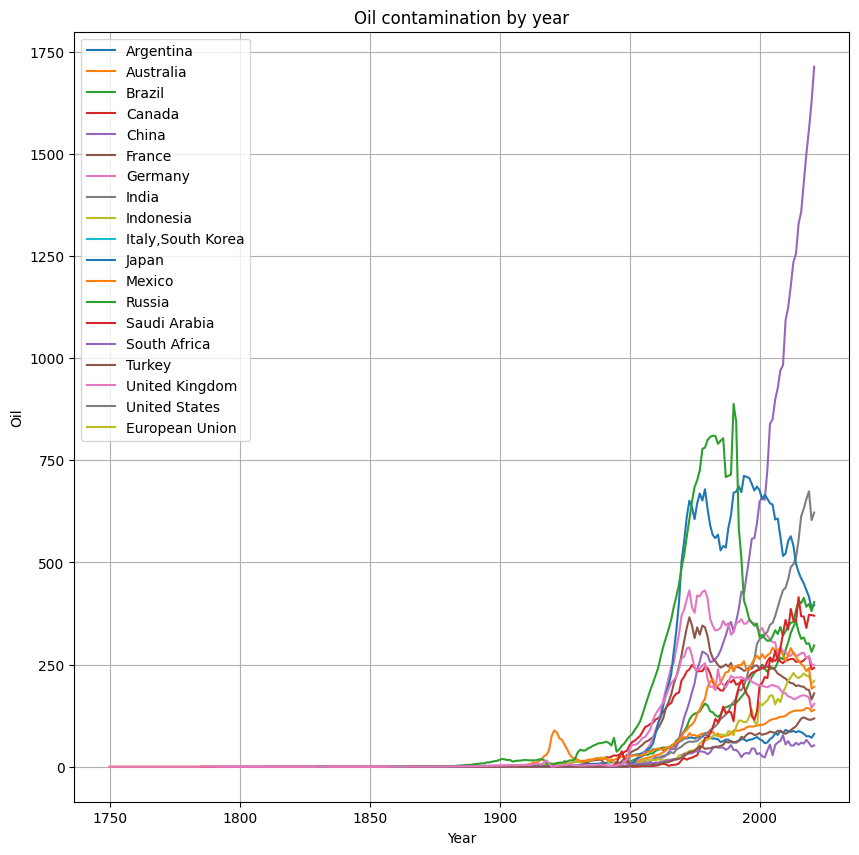

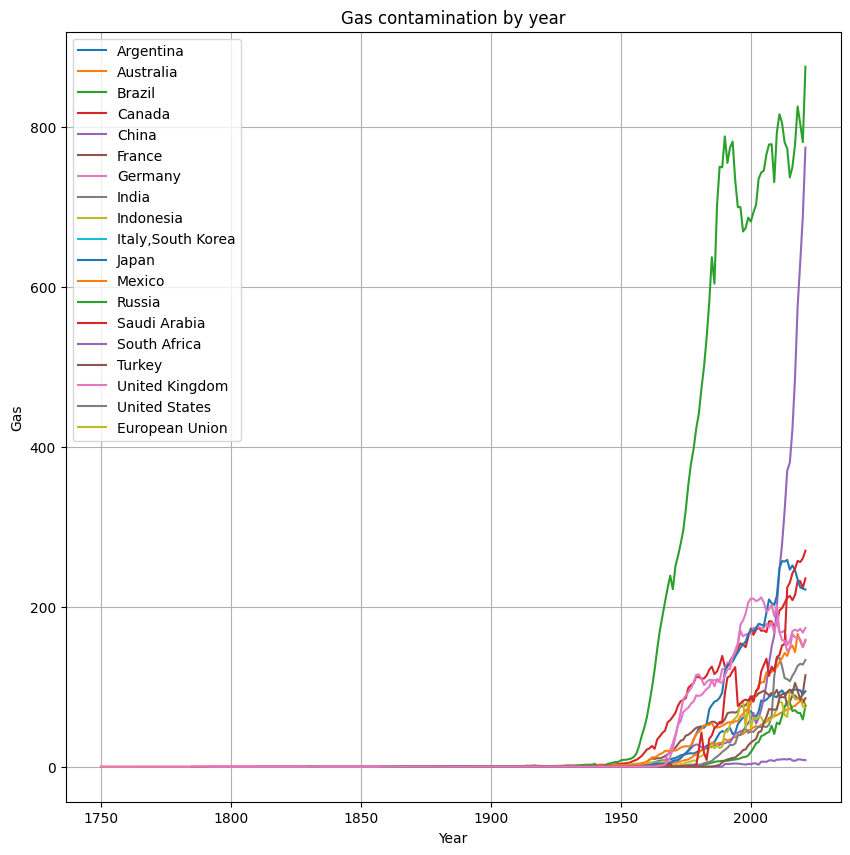

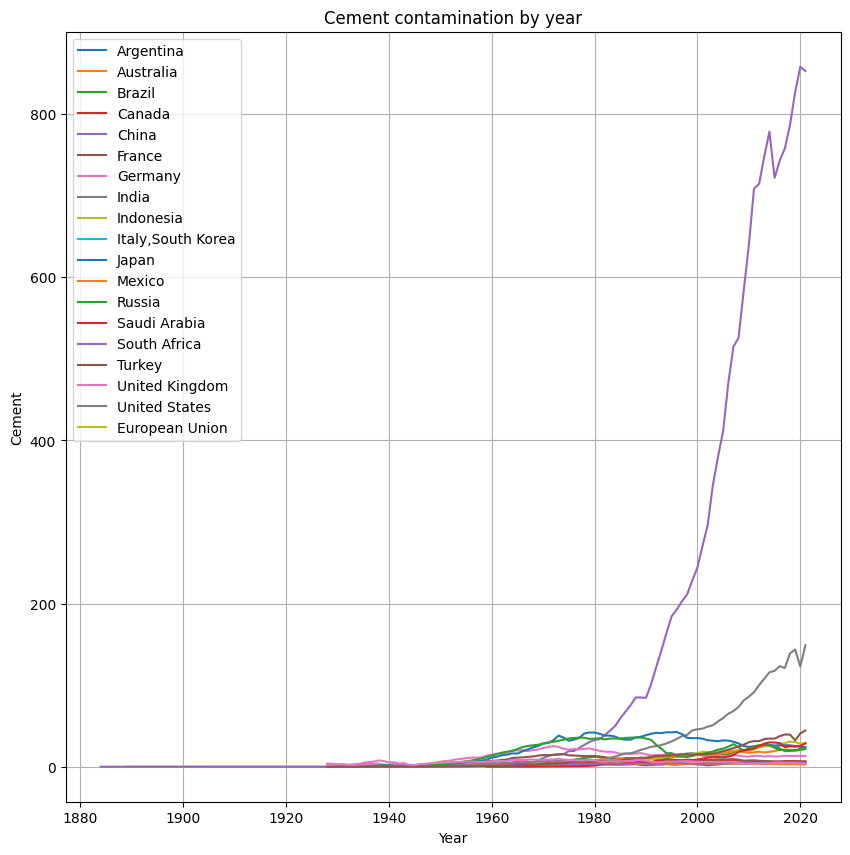

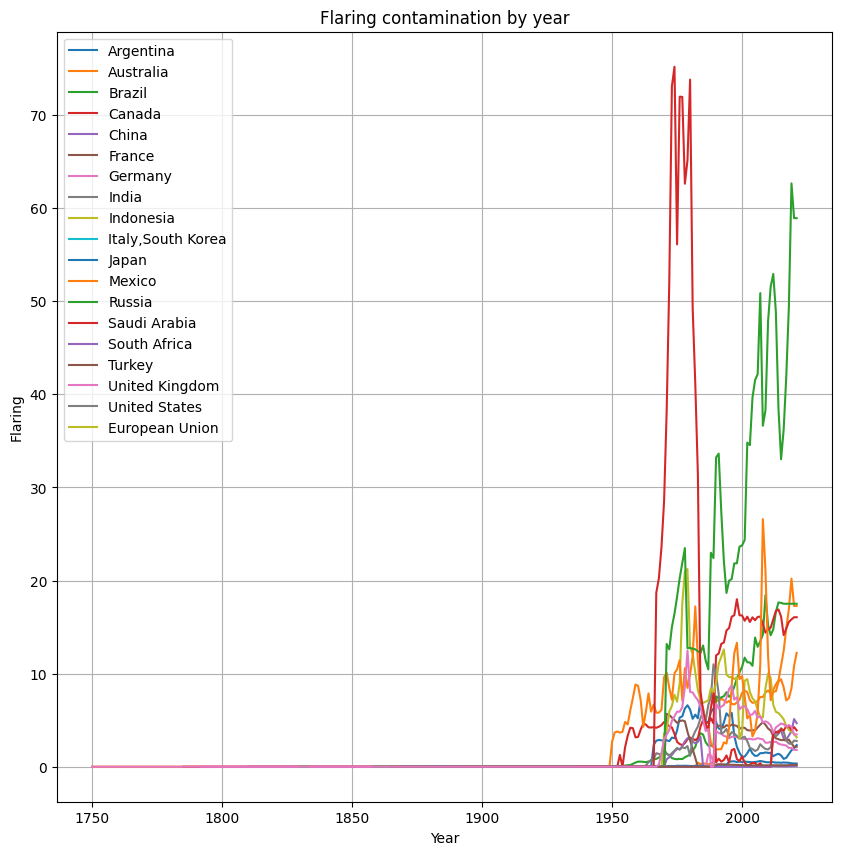

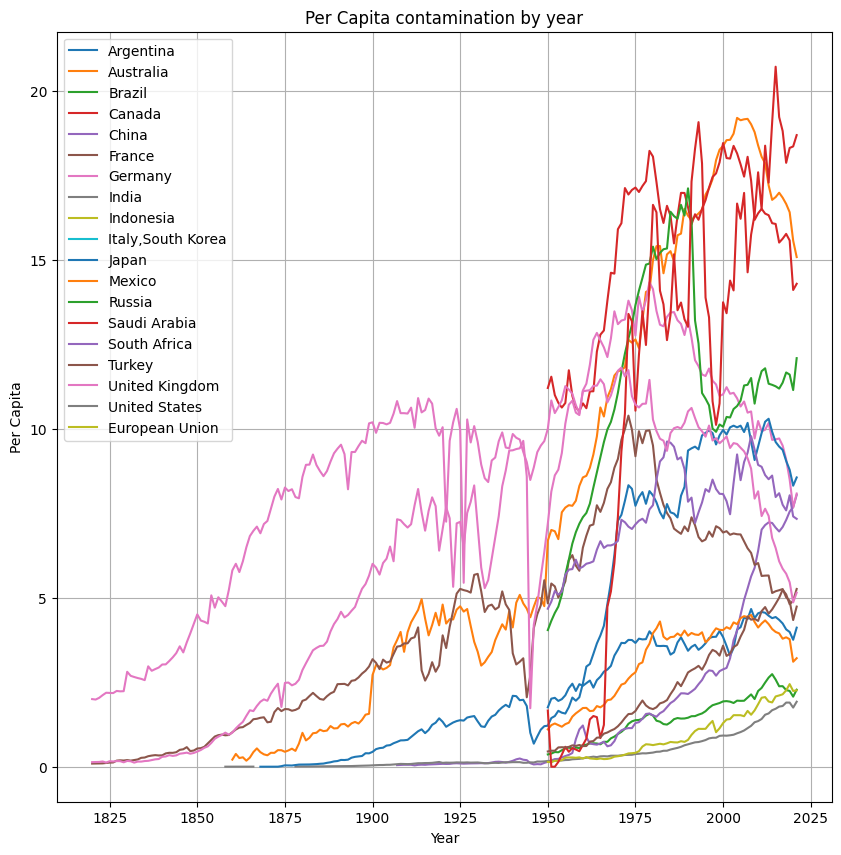

In [73]:
#Separación de los datos del G20 del resto del dataset
countries_list = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy,' 'South Korea', 'Japan', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom', 'United States', 'European Union']
countries_data = {}
for country in countries_list:
    countries_data.update({country : df[df['Country'] == country]})

#Se seleccionan las columnas de las que se desea obtener una gráfica
columns_to_graph = ['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita']

#Y se cicla sobre cada columna para generar la gráfica.
for index, column in enumerate(columns_to_graph):
    fig, ax = plt.subplots(figsize = (10,10))
    for country in countries_list:
        countries_data[country].plot(x = 'Year', y = column, ax = ax, label = country, title = column + ' contamination by year', grid = True, ylabel = column, xlabel = 'Year')


**Análisis de los datos del G20**

In [109]:
#¿Cuáles son los 3 países que más contaminan en cada caso?

#Creación de un dataframe con todos los dataframes de cada país del G20
countries_data_list = list(countries_data.values())
G20_df = pd.concat(countries_data_list, axis = 0)
G20_df = G20_df.reset_index()
G20_df = G20_df.drop(labels = ['index', 'Year', 'Other'], axis = 1)

#Agrupación por país. Se calcula la suma de cada columna y posteriormente se obtienen los 3 pases con el
#mayor valor en cada categoría.
total_contamination_df = G20_df.groupby('Country').sum()
columns_to_analyse = ['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita']
top_countries = {}
for column in columns_to_analyse:
    top_countries.update({column : total_contamination_df.reset_index().nlargest(3, column)['Country'].tolist()})
print(f'Los 3 países más contaminantes por cada categoría son: \n{top_countries}\n')

#¿Con qué porcentaje contribuye México al Total y Per Capita?
columns_to_analyse = ['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita']
mexico_comparative = {}
for column in columns_to_analyse:
    mexico_sum = total_contamination_df.loc['Mexico', column]
    global_sum = total_contamination_df[column].sum()
    mexico_sum_percentage = mexico_sum / global_sum * 100
    mexico_comparative.update({column : mexico_sum_percentage})
    print(f"El valor total de México representa el {mexico_comparative[column]:.2f}% del valor total de la columna {column} en el DataFrame")

Los 3 países más contaminantes por cada categoría son: 
{'Total': ['China', 'Russia', 'Germany'], 'Coal': ['China', 'Germany', 'United Kingdom'], 'Oil': ['China', 'Russia', 'Japan'], 'Gas': ['Russia', 'Canada', 'United Kingdom'], 'Cement': ['China', 'India', 'Japan'], 'Flaring': ['Russia', 'Saudi Arabia', 'Canada'], 'Per Capita': ['United Kingdom', 'Germany', 'Australia']}

El valor total de México representa el 2.38% del valor total de la columna Total en el DataFrame
El valor total de México representa el 0.31% del valor total de la columna Coal en el DataFrame
El valor total de México representa el 5.64% del valor total de la columna Oil en el DataFrame
El valor total de México representa el 4.43% del valor total de la columna Gas en el DataFrame
El valor total de México representa el 2.41% del valor total de la columna Cement en el DataFrame
El valor total de México representa el 9.50% del valor total de la columna Flaring en el DataFrame
El valor total de México representa el 2.30